In [1]:
import os
from pynq import PL
from pynq import Overlay
from pynq.lib.video import *
from pynq import Xlnk
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Download FPGA
# name of bit and hwh file must be same
ol = Overlay("base/vdma_pass.bit")

In [3]:
vdma_in = ol.axi_vdma_0

In [4]:
vdma_out = ol.axi_vdma_1

In [5]:
# Read an cute Ahri's picture stored in SD CARD
ahri = cv2.imread("data/ahri1.jpg")

In [6]:
# Set VDMA Videomode
# Width 1920, Height 1080, Data Width 24 RGB
framemode = VideoMode(1920,1080,24)

In [7]:
vdma_in.writechannel.mode = framemode
vdma_out.readchannel.mode = framemode

In [8]:
# Contiguous Memory Arrays(CMA) are required for VDMAs
# Since they read/store with the starting address of image frame array
xlnk = Xlnk()
in_buffer = xlnk.cma_array(shape=(1080, 1920, 3), dtype=np.uint8, cacheable=1)
out_buffer = xlnk.cma_array(shape=(1080, 1920, 3), dtype=np.uint8, cacheable=1)

In [9]:
# Deep copy image frame stored in numpy array to input buffer CMA
in_buffer[:] = ahri

In [10]:
vdma_in.writechannel.start()
vdma_out.readchannel.start()

In [11]:
vdma_in.writechannel.setframe(in_buffer)

In [12]:
out_buffer = vdma_out.readchannel.readframe()

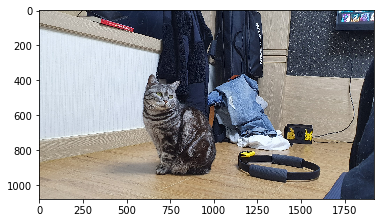

In [14]:
result = out_buffer
# Change colour space order from OpenCV BGR to RGB for pyplot
result = cv2.cvtColor(result, cv2.COLOR_BGR2RGB)
plt.imshow(result)

In [ ]:
# Reset to Flush Datas
vdma_in.writechannel.reset()
vdma_out.readchannel.reset()
ol.reset()

In [ ]:
# IF YOU WERE NOT ABLE TO RECEIVE IMAGE FRAME,
# TRY SEND AND READ FRAME FOR FEW TIMES MORE